In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import auc
from scipy import stats

In [80]:
lasso_train = pd.read_csv('D:/work/Rheumatoid arthritis/result/modeling/LASSO_train.csv')
lasso_test = pd.read_csv('D:/work/Rheumatoid arthritis/result/modeling/LASSO_test.csv')
svm_train = pd.read_csv('D:/work/Rheumatoid arthritis/result/modeling/SVM_train.csv')
svm_test = pd.read_csv('D:/work/Rheumatoid arthritis/result/modeling/SVM_test.csv')
rf_train = pd.read_csv('D:/work/Rheumatoid arthritis/result/modeling/RF_train.csv')
rf_test = pd.read_csv('D:/work/Rheumatoid arthritis/result/modeling/RF_test.csv')
xgboost_train = pd.read_csv('D:/work/Rheumatoid arthritis/result/modeling/Xgboost_train.csv')
xgboost_test = pd.read_csv('D:/work/Rheumatoid arthritis/result/modeling/Xgboost_test.csv')
bpnn_train = pd.read_csv('D:/work/Rheumatoid arthritis/result/modeling/BPNN_train.csv')
bpnn_test = pd.read_csv('D:/work/Rheumatoid arthritis/result/modeling/BPNN_test.csv')
cnn_train = pd.read_csv('D:/work/Rheumatoid arthritis/result/modeling/CNN_train.csv')
cnn_test = pd.read_csv('D:/work/Rheumatoid arthritis/result/modeling/CNN_test.csv')

lasso_auc_train = pd.read_csv('D:/work/Rheumatoid arthritis/result/modeling/LASSO_AUC_train.csv')
lasso_auc_test = pd.read_csv('D:/work/Rheumatoid arthritis/result/modeling/LASSO_AUC_test.csv')
svm_auc_train = pd.read_csv('D:/work/Rheumatoid arthritis/result/modeling/SVM_AUC_train.csv')
svm_auc_test = pd.read_csv('D:/work/Rheumatoid arthritis/result/modeling/SVM_AUC_test.csv')
rf_auc_train = pd.read_csv('D:/work/Rheumatoid arthritis/result/modeling/RF_AUC_train.csv')
rf_auc_test = pd.read_csv('D:/work/Rheumatoid arthritis/result/modeling/RF_AUC_test.csv')
xgboost_auc_train = pd.read_csv('D:/work/Rheumatoid arthritis/result/modeling/Xgboost_AUC_train.csv')
xgboost_auc_test = pd.read_csv('D:/work/Rheumatoid arthritis/result/modeling/Xgboost_AUC_test.csv')
bpnn_auc_train = pd.read_csv('D:/work/Rheumatoid arthritis/result/modeling/BPNN_AUC_train.csv')
bpnn_auc_test = pd.read_csv('D:/work/Rheumatoid arthritis/result/modeling/BPNN_AUC_test.csv')
cnn_auc_train = pd.read_csv('D:/work/Rheumatoid arthritis/result/modeling/CNN_AUC_train.csv')
cnn_auc_test = pd.read_csv('D:/work/Rheumatoid arthritis/result/modeling/CNN_AUC_test.csv')

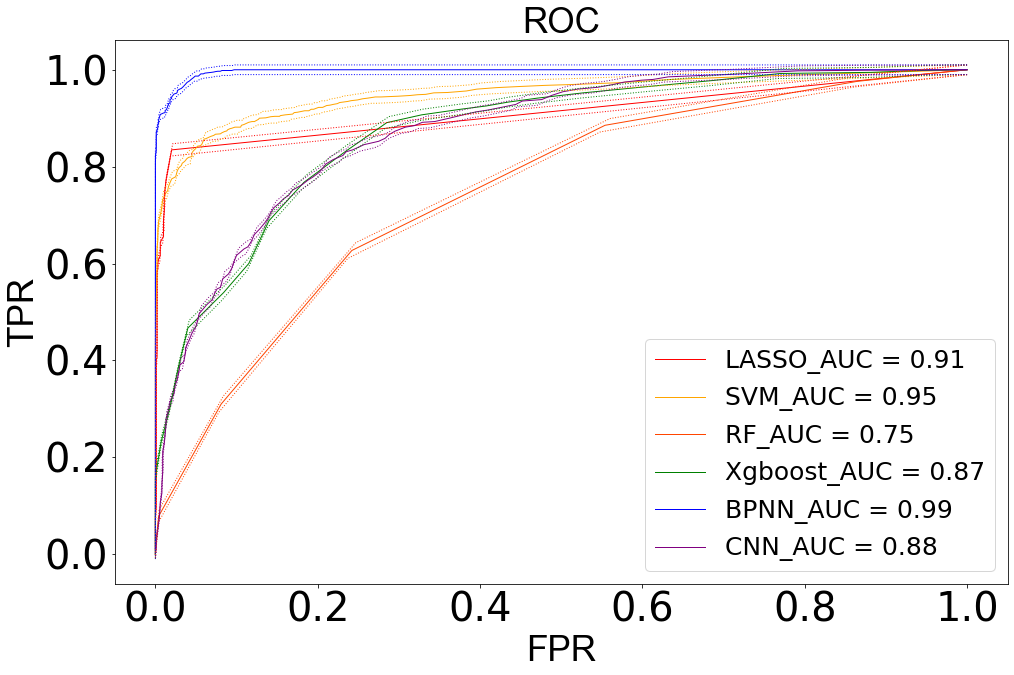

In [88]:
lasso_fpr_up = list(lasso_test.FPR_up) + [0]
lasso_fpr = list(lasso_test.FPR) + [0]
lasso_fpr_down = list(lasso_test.FPR_down) + [0]
lasso_tpr_up = list(lasso_test.TPR_up) + [0]
lasso_tpr = list(lasso_test.TPR) + [0]
lasso_tpr_down = list(lasso_test.TPR_down) + [0]
svm_fpr_up = list(svm_test.FPR_up) + [0]
svm_fpr = list(svm_test.FPR) + [0]
svm_fpr_down = list(svm_test.FPR_down) + [0]
svm_tpr_up = list(svm_test.TPR_up) + [0]
svm_tpr = list(svm_test.TPR) + [0]
svm_tpr_down = list(svm_test.TPR_down) + [0]
rf_fpr_up = list(rf_test.FPR_up) + [0]
rf_fpr = list(rf_test.FPR) + [0]
rf_fpr_down = list(rf_test.FPR_down) + [0]
rf_tpr_up = list(rf_test.TPR_up) + [0]
rf_tpr = list(rf_test.TPR) + [0]
rf_tpr_down = list(rf_test.TPR_down) + [0]
xgboost_fpr_up = list(xgboost_test.FPR_up) + [0]
xgboost_fpr = list(xgboost_test.FPR) + [0]
xgboost_fpr_down = list(xgboost_test.FPR_down) + [0]
xgboost_tpr_up = list(xgboost_test.TPR_up) + [0]
xgboost_tpr = list(xgboost_test.TPR) + [0]
xgboost_tpr_down = list(xgboost_test.TPR_down) + [0]
bpnn_fpr_up = list(bpnn_test.FPR_up) + [0]
bpnn_fpr = list(bpnn_test.FPR) + [0]
bpnn_fpr_down = list(bpnn_test.FPR_down) + [0]
bpnn_tpr_up = list(bpnn_test.TPR_up) + [0]
bpnn_tpr = list(bpnn_test.TPR) + [0]
bpnn_tpr_down = list(bpnn_test.TPR_down) + [0]
cnn_fpr_up = list(cnn_test.FPR_up) + [0]
cnn_fpr = list(cnn_test.FPR) + [0]
cnn_fpr_down = list(cnn_test.FPR_down) + [0]
cnn_tpr_up = list(cnn_test.TPR_up) + [0]
cnn_tpr = list(cnn_test.TPR) + [0]
cnn_tpr_down = list(cnn_test.TPR_down) + [0]

for i in range(len(lasso_tpr)):
    lasso_tpr_up[i] = lasso_tpr_up[i] + 0.01
    lasso_tpr_down[i] = lasso_tpr_down[i] - 0.01
for i in range(len(svm_tpr)):
    svm_tpr_up[i] = svm_tpr_up[i] + 0.01
    svm_tpr_down[i] = svm_tpr_down[i] - 0.01
for i in range(len(rf_tpr)):
    rf_tpr_up[i] = rf_tpr_up[i] + 0.01
    rf_tpr_down[i] = rf_tpr_down[i] - 0.01
for i in range(len(xgboost_tpr)):
    xgboost_tpr_up[i] = xgboost_tpr_up[i] + 0.01
    xgboost_tpr_down[i] = xgboost_tpr_down[i] - 0.01
for i in range(len(bpnn_tpr)):
    bpnn_tpr_up[i] = bpnn_tpr_up[i] + 0.01
    bpnn_tpr_down[i] = bpnn_tpr_down[i] - 0.01
for i in range(len(cnn_tpr)):
    cnn_tpr_up[i] = cnn_tpr_up[i] + 0.01
    cnn_tpr_down[i] = cnn_tpr_down[i] - 0.01
    
lasso_auc = auc(lasso_fpr, lasso_tpr).round(2)
svm_auc = auc(svm_fpr, svm_tpr).round(2)
rf_auc = auc(rf_fpr, rf_tpr).round(2)
xgboost_auc = auc(xgboost_fpr, xgboost_tpr).round(2)
bpnn_auc = auc(bpnn_fpr, bpnn_tpr).round(2)
cnn_auc = auc(cnn_fpr, cnn_tpr).round(2)

plt.figure(figsize=(16,10))
formation={'family':'Arial','size':35}
plt.xlabel('FPR',formation)
plt.ylabel('TPR',formation)
plt.title('ROC',formation)
plt.tick_params(labelsize=40)
plt.plot(lasso_fpr, lasso_tpr, linewidth=1, linestyle = '-', c='red')
plt.plot(svm_fpr, svm_tpr, linewidth=1, linestyle = '-', c='orange')
plt.plot(rf_fpr, rf_tpr, linewidth=1, linestyle = '-', c='orangered')
plt.plot(xgboost_fpr, xgboost_tpr, linewidth=1, linestyle = '-', c='green')
plt.plot(bpnn_fpr, bpnn_tpr, linewidth=1, linestyle = '-', c='blue')
plt.plot(cnn_fpr, cnn_tpr, linewidth=1, linestyle = '-', c='purple')
plt.legend(['LASSO_AUC = {}'.format(lasso_auc),'SVM_AUC = {}'.format(svm_auc),'RF_AUC = {}'.format(rf_auc),'Xgboost_AUC = {}'.format(xgboost_auc),'BPNN_AUC = {}'.format(0.99), 'CNN_AUC = {}'.format(cnn_auc)], fontsize = 25)
plt.plot(lasso_fpr_up, lasso_tpr_up, linewidth=1, linestyle = ':', c='red')
plt.plot(lasso_fpr_down, lasso_tpr_down, linewidth=1, linestyle = ':', c='red')
plt.plot(svm_fpr_up, svm_tpr_up, linewidth=1, linestyle = ':', c='orange')
plt.plot(svm_fpr_down, svm_tpr_down, linewidth=1, linestyle = ':', c='orange')
plt.plot(rf_fpr_up, rf_tpr_up, linewidth=1, linestyle = ':', c='orangered')
plt.plot(rf_fpr_down, rf_tpr_down, linewidth=1, linestyle = ':', c='orangered')
plt.plot(xgboost_fpr_up, xgboost_tpr_up, linewidth=1, linestyle = ':', c='green')
plt.plot(xgboost_fpr_down, xgboost_tpr_down, linewidth=1, linestyle = ':', c='green')
plt.plot(bpnn_fpr_up, bpnn_tpr_up, linewidth=1, linestyle = ':', c='blue')
plt.plot(bpnn_fpr_down, bpnn_tpr_down, linewidth=1, linestyle = ':', c='blue')
plt.plot(cnn_fpr_up, cnn_tpr_up, linewidth=1, linestyle = ':', c='purple')
plt.plot(cnn_fpr_down, cnn_tpr_down, linewidth=1, linestyle = ':', c='purple')
plt.savefig('D:/work/Rheumatoid arthritis/result/modeling/ROC.png')

In [81]:
lasso_auc = pd.read_csv('D:/work/Rheumatoid arthritis/result/modeling/LASSO_AUC_test.csv')
svm_auc = pd.read_csv('D:/work/Rheumatoid arthritis/result/modeling/SVM_AUC_test.csv')
rf_auc = pd.read_csv('D:/work/Rheumatoid arthritis/result/modeling/RF_AUC_test.csv')
xgboost_auc = pd.read_csv('D:/work/Rheumatoid arthritis/result/modeling/Xgboost_AUC_test.csv')
bpnn_auc = pd.read_csv('D:/work/Rheumatoid arthritis/result/modeling/BPNN_AUC_test.csv')
cnn_auc = pd.read_csv('D:/work/Rheumatoid arthritis/result/modeling/CNN_AUC_test.csv')

lasso_auc = list(lasso_auc.LASSO)
svm_auc = list(svm_auc.SVM)
rf_auc = list(rf_auc.RF)
xgboost_auc = list(xgboost_auc.Xgboost)
bpnn_auc = list(bpnn_auc.BPNN)
cnn_auc = list(cnn_auc.CNN)

lasso_p = stats.ttest_1samp(lasso_auc, 0.89).pvalue
svm_p = stats.ttest_1samp(svm_auc, 0.95).pvalue
rf_p = stats.ttest_1samp(rf_auc, 0.75).pvalue
xgboost_p = stats.ttest_1samp(xgboost_auc, 0.87).pvalue
bpnn_p = stats.ttest_1samp(bpnn_auc, 1.00).pvalue
cnn_p = stats.ttest_1samp(cnn_auc, 0.88).pvalue
print(lasso_p, svm_p, rf_p, xgboost_p, bpnn_p, cnn_p)

0.000307822386267191 4.385126355184559e-12 0.012778729882812019 8.961924264604506e-41 1.7569816627003255e-09 0.012750635905186698


In [87]:
print(np.mean(lasso_auc), (np.std(lasso_auc) / 100) * 1.96)
print(np.mean(svm_auc), (np.std(svm_auc) / 100) * 1.96)
print(np.mean(rf_auc), (np.std(rf_auc) / 100) * 1.96)
print(np.mean(xgboost_auc), (np.std(xgboost_auc) / 100) * 1.96)
print(np.mean(bpnn_auc), (np.std(bpnn_auc) / 100) * 1.96)
print(np.mean(cnn_auc), (np.std(cnn_auc) / 100) * 1.96)

0.9158829949755352 0.001349430869080644
0.9905751705200904 0.0010044752394733453
0.7913447537740577 0.0031794807266026792
0.9415752572122824 0.0006192269673144602
0.996959774608863 8.93838733679831e-05
0.904767630025805 0.0019040550327569735


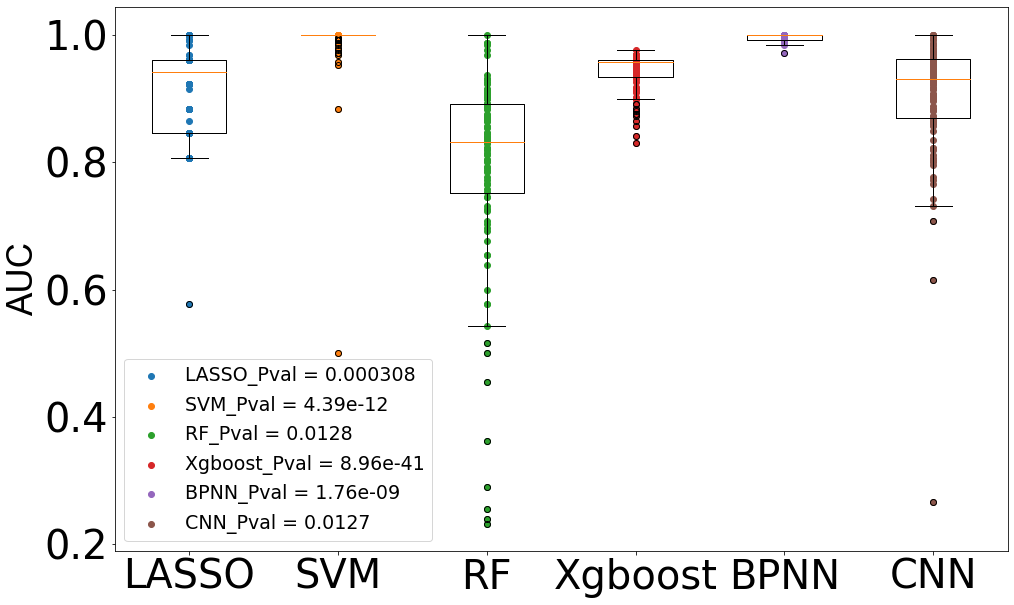

In [78]:
plt.figure(figsize=(16,10))
plt.scatter([1] * len(lasso_auc), lasso_auc)
plt.scatter([2] * len(svm_auc), svm_auc)
plt.scatter([3] * len(rf_auc), rf_auc)
plt.scatter([4] * len(xgboost_auc), xgboost_auc)
plt.scatter([5] * len(bpnn_auc), bpnn_auc)
plt.scatter([6] * len(cnn_auc), cnn_auc)
plt.legend(['LASSO_Pval = {}'.format(3.08e-04),'SVM_Pval = {}'.format(4.39e-12),'RF_Pval = {}'.format(1.28e-02),'Xgboost_Pval = {}'.format(8.96e-41),'BPNN_Pval = {}'.format(1.76e-09), 'CNN_Pval = {}'.format(1.27e-02)], fontsize = 19)
plt.boxplot([lasso_auc, svm_auc, rf_auc, xgboost_auc, bpnn_auc, cnn_auc])
formation={'family':'Arial','size':35}
plt.xticks([i for i in range(1,7)], ['LASSO', 'SVM', 'RF', 'Xgboost', 'BPNN', 'CNN'])
plt.ylabel('AUC',formation)
plt.tick_params(labelsize=40)
plt.savefig('D:/work/Rheumatoid arthritis/result/modeling/AUC.png')